In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [ ]:
recipe_path = "data/RAW_recipes.csv"

recipes_df = pd.read_csv(recipe_path, index_col="id")

In [ ]:
recipes_df.head()

,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
id,,,,,,,,,,,
137739,arriba baked winter squash mexican style,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
31490,a bit different breakfast pizza,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
112140,all in the kitchen chili,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
59389,alouette potatoes,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
44061,amish tomato ketchup for canning,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


Let's create the starting dataframe with only the relevant characteristics

In [ ]:
recipes_short = recipes_df[["name", "ingredients"]].sort_values("id")
recipes_short.head()

,name,ingredients
id,,
38,low fat berry blue frozen dessert,"['blueberries', 'granulated sugar', 'vanilla y..."
39,biryani,"['saffron', 'milk', 'hot green chili peppers',..."
40,best lemonade,"['sugar', 'lemons, rind of', 'fresh water', 'f..."
41,carina s tofu vegetable kebabs,"['extra firm tofu', 'eggplant', 'zucchini', 'r..."
43,best blackbottom pie,"['graham cracker crumbs', 'sugar', 'butter', '..."


Now we want to work on the df to extract all the ingredient names
1) convert the items to lists

In [ ]:
recipes_short["ingredients"] = recipes_short["ingredients"].apply(eval)
recipes_short.head()

,name,ingredients
id,,
38,low fat berry blue frozen dessert,"[blueberries, granulated sugar, vanilla yogurt..."
39,biryani,"[saffron, milk, hot green chili peppers, onion..."
40,best lemonade,"[sugar, lemons, rind of, fresh water, fresh le..."
41,carina s tofu vegetable kebabs,"[extra firm tofu, eggplant, zucchini, red pepp..."
43,best blackbottom pie,"[graham cracker crumbs, sugar, butter, cornsta..."


Now we can count how many elements are there for each ingredient and apply other actions

In [ ]:
recipes_short["ingredients"].explode().value_counts()

ingredients
salt                               85746
butter                             54975
sugar                              44535
onion                              39065
water                              34914
                                   ...  
spanish rice and vermicelli mix        1
fruit bits                             1
passover wine                          1
smoked trout fillet                    1
gummy ring                             1
Name: count, Length: 14942, dtype: int64

Let's try to plot the top 20 used ingredients now

Text(0.5, 1.0, 'Ingredients used in recipes')

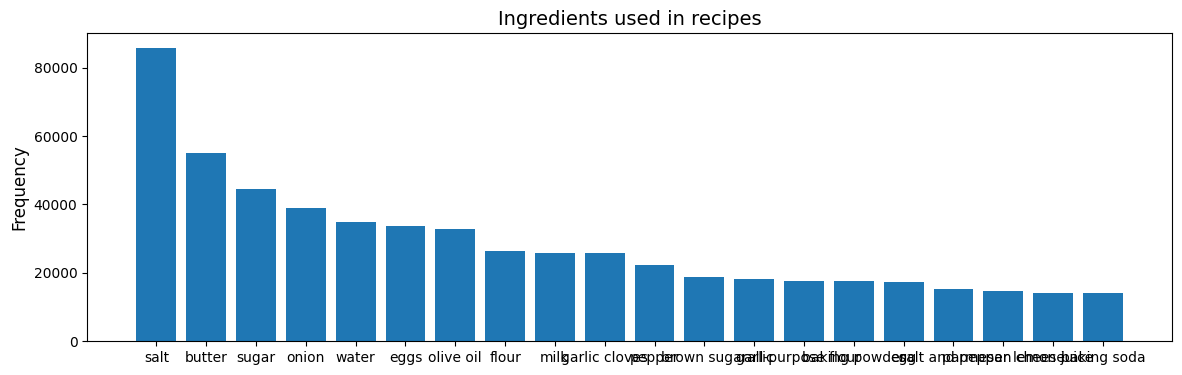

In [ ]:
# Get unique items & counts
unique_values = recipes_short["ingredients"].explode().value_counts().index.tolist()
unique_value_counts = recipes_short["ingredients"].explode().value_counts().values
# Create plot
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(unique_values[:20], unique_value_counts[:20])
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Ingredients used in recipes", size = 14)

to get much further in terms of our analysis the best thing we can do now is to explode in our initial dataframe the ingredients column into *n* columns where n is the number of ingredients and the corresponding value will be 1 if the recipe has the specific ingredient

In [ ]:
def boolean_df(item_lists, unique_items):
# Create empty dict
    bool_dict = {}

    # Loop through all the tags
    for i, item in enumerate(unique_items):

        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)

    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

recipes_bool = boolean_df(
  item_lists = recipes_short["ingredients"],
  unique_items = unique_values
)

: 

: 